### Exploring and Processing the Data

In [2]:
#importing
import pandas as pd

In [3]:
#reading file on dataset
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
#converting data into arrays
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
#splitting out dataset into input features and features we want to predict
X = dataset[:,0:10]
Y = dataset[:,10]

In [12]:
#more importing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [10]:
#scaling the dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
#splitting dataset into training, test and validation set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

**We now have a total of six variables for our datasets we will use:**

- X_train (10 input features, 70% of full dataset)
- X_val (10 input features, 15% of full dataset)
- X_test (10 input features, 15% of full dataset)
- Y_train (1 label, 70% of full dataset)
- Y_val (1 label, 15% of full dataset)
- Y_test (1 label, 15% of full dataset)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Building and Training our NN

In [17]:
#importing stuffs
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
#specifiying Keras sequential model aka defining architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
#connfiguring the model with specific settings
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
#training
hist = model.fit(X_train, Y_train, batch_size=25, epochs=120,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/120
1022/1022 [==============================] - 0s 116us/step - loss: 0.2282 - accuracy: 0.9110 - val_loss: 0.2926 - val_accuracy: 0.8995
Epoch 2/120
1022/1022 [==============================] - 0s 103us/step - loss: 0.2284 - accuracy: 0.9080 - val_loss: 0.2809 - val_accuracy: 0.8904
Epoch 3/120
1022/1022 [==============================] - 0s 96us/step - loss: 0.2289 - accuracy: 0.9070 - val_loss: 0.2853 - val_accuracy: 0.8904
Epoch 4/120
1022/1022 [==============================] - 0s 93us/step - loss: 0.2276 - accuracy: 0.9041 - val_loss: 0.2928 - val_accuracy: 0.8995
Epoch 5/120
1022/1022 [==============================] - 0s 91us/step - loss: 0.2273 - accuracy: 0.9080 - val_loss: 0.2880 - val_accuracy: 0.8950
Epoch 6/120
1022/1022 [==============================] - 0s 98us/step - loss: 0.2277 - accuracy: 0.9070 - val_loss: 0.2819 - val_accuracy: 0.8904
Epoch 7/120
1022/1022 [==============================] - 0s 118us/step - lo

In [25]:
#evaluating final model on the test set
model.evaluate(X_test, Y_test)[1]


219/219 [==============================] - 0s 149us/step


0.8767123222351074

### Visualizing Loss and Accuracy

In [26]:
#importing MORE stuff
import matplotlib.pyplot as plt

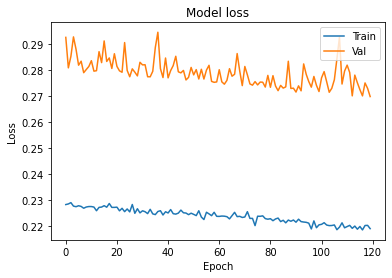

In [27]:
#visualzing the training loss and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

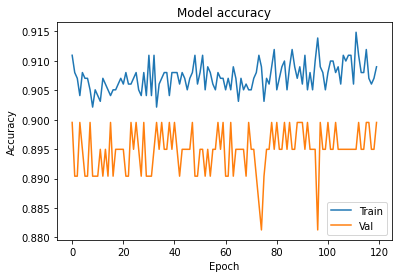

In [32]:
#plotting our training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding Regularization to our NN

Just for the sake of introducing regularization to our Neural Network, forumlate with a NN that will badly overfit our training set. Call it Model 2

In [34]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

In [35]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4829 - accuracy: 0.7730 - val_loss: 0.4507 - val_accuracy: 0.7900
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3327 - accuracy: 0.8728 - val_loss: 0.3881 - val_accuracy: 0.8219
Epoch 3/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.2798 - accuracy: 0.8816 - val_loss: 0.4299 - val_accuracy: 0.8584
Epoch 4/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.2807 - accuracy: 0.8904 - val_loss: 0.3479 - val_accuracy: 0.8767
Epoch 5/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.2556 - accuracy: 0.8845 - val_loss: 0.3352 - val_accuracy: 0.8767
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2420 - accuracy: 0.9100 - val_loss: 0.3251 - val_accuracy: 0.8813
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2410

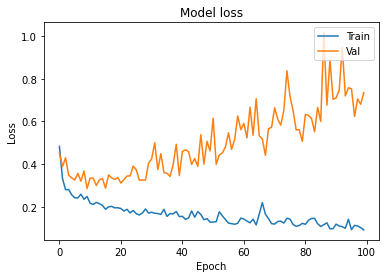

In [37]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

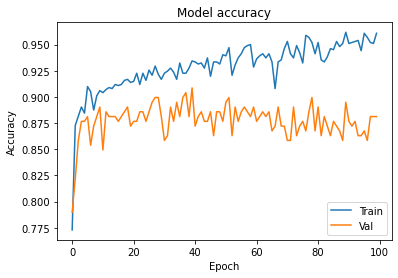

In [39]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

now we're gonna try to reduce overfitting in Model 3!

In [40]:
from keras.layers import Dropout
from keras import regularizers

In [41]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

Two main differences between Model 3 and Model 2:
- Difference 1: 
  - To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers like this: kernel_regularizer=regularizers.l2(0.01). 
  - This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.
- Difference 2:
  - To add Dropout, we added a new layer like this: Dropout(0.3)
  - This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training.

In [43]:
#compile it and run it with the same parameters as Model 2
model_3.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 5s 5ms/step - loss: 14.2417 - accuracy: 0.6262 - val_loss: 3.9070 - val_accuracy: 0.6575
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.6545 - accuracy: 0.8425 - val_loss: 0.6643 - val_accuracy: 0.8767
Epoch 3/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.5497 - accuracy: 0.8689 - val_loss: 0.5416 - val_accuracy: 0.8858
Epoch 4/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.5034 - accuracy: 0.8659 - val_loss: 0.4961 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4849 - accuracy: 0.8816 - val_loss: 0.5155 - val_accuracy: 0.8813
Epoch 6/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4559 - accuracy: 0.8924 - val_loss: 0.4834 - val_accuracy: 0.8813
Epoch 7/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.469

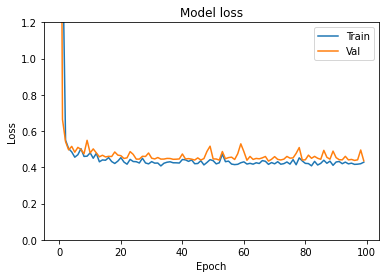

In [44]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

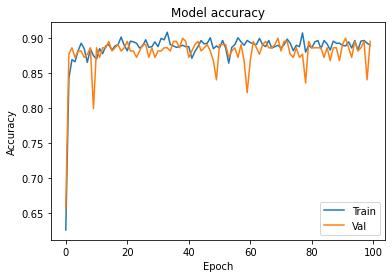

In [46]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()